# Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Paths to the data and correlation results
data_path = "/mnt/c/Users/Elena/Desktop/Data_processing/020226_U2OS2_fixed_MGS1/res8/results.csv"
corr_path = "/mnt/c/Users/Elena/Desktop/Data_processing/020226_U2OS2_fixed_MGS1/res8/spearman_pairs.csv"
output_dir = "/mnt/c/Users/Elena/Desktop/Data_processing/020226_U2OS2_fixed_MGS1/res8/"

# Load the data
data = pd.read_csv(data_path)
# Load the correlation results
corr_results = pd.read_csv(corr_path)

# Boxplots

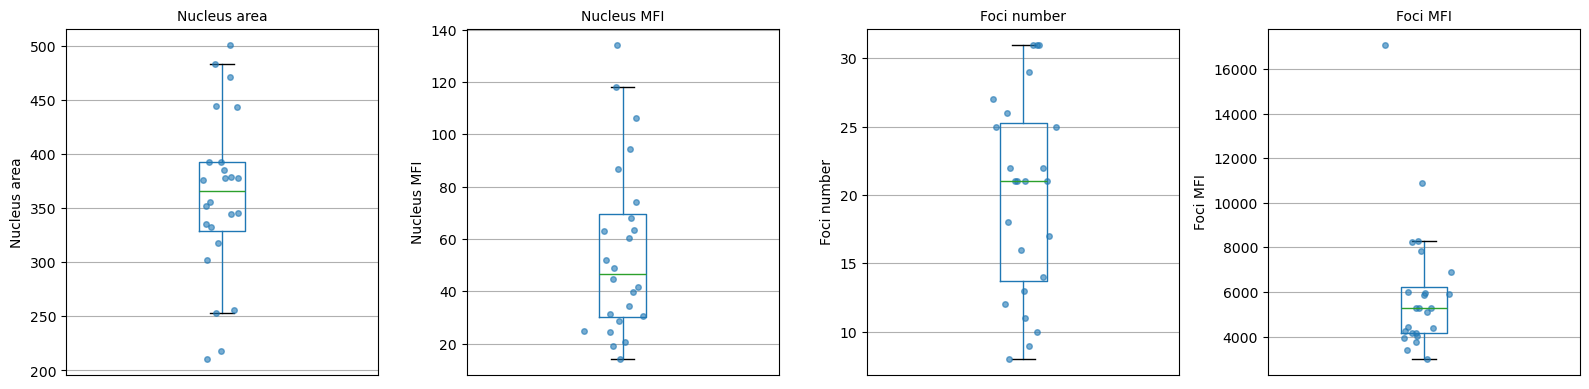

In [ ]:
numeric_cols = data.select_dtypes(include="number").columns
n = len(numeric_cols)

fig, axes = plt.subplots(
    nrows=1,
    ncols=n,
    figsize=(4 * n, 4),   # controls size (smaller plots)
    sharey=False
)

# If only one column, axes is not a list
if n == 1:
    axes = [axes]

for ax, column_name in zip(axes, numeric_cols):
    # Boxplot
    data.boxplot(
        column=column_name,
        showfliers=False,
        ax=ax
    )

    # Jittered dots
    y = data[column_name].dropna().values
    x = np.random.normal(loc=1, scale=0.04, size=len(y))
    ax.plot(x, y, "o", alpha=0.6, markersize=4)

    # Labels
    ax.set_ylabel(column_name.replace("_", " "))
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_title(column_name.replace("_", " "), fontsize=10)

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig(output_dir + "boxplots.png", dpi=300)

# Spearman correlation visualization

In [4]:
corr_results

,var1,var2,n,spearman_r,p_value
0,Nucleus_area,Nucleus_MFI,24,-0.086957,0.686195
1,Nucleus_area,Foci_number,24,-0.286215,0.175139
2,Nucleus_area,Foci_MFI,24,0.563478,0.004140
3,Nucleus_MFI,Foci_number,24,0.198518,0.352413
4,Nucleus_MFI,Foci_MFI,24,-0.286957,0.173974
5,Foci_number,Foci_MFI,24,-0.529672,0.007770


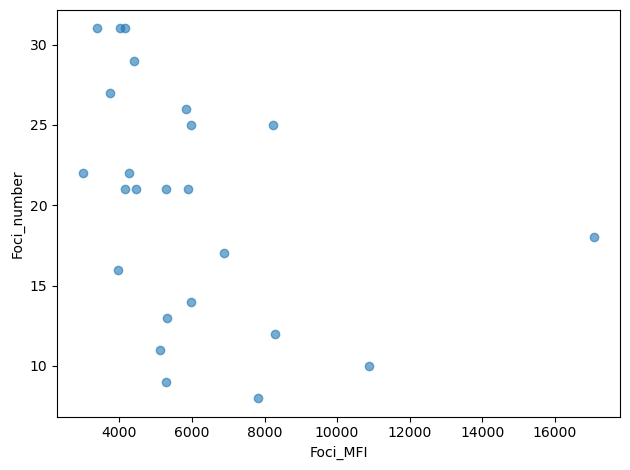

In [5]:
col1 = "Foci_MFI"
col2 = "Foci_number"

plt.figure()
plt.scatter(data[col1], data[col2], alpha=0.6)
plt.xlabel(col1)
plt.ylabel(col2)
plt.tight_layout()
plt.show()